In [219]:
import sys
sys.path.append('../')

import numpy as np
from scipy import ndimage

from skimage.filters import sobel_h
from skimage.filters import sobel_v
from scipy import stats


import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


import scienceplots
from tensorflow.python.client import device_lib

#plt.rcParams['figure.figsize'] = [10,10]

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16

from tensorflow.nn import depthwise_conv2d
from tensorflow.math import multiply, reduce_sum, reduce_mean,reduce_euclidean_norm, sin, cos, abs
from tensorflow import stack, concat, expand_dims

import tensorflow_probability as tfp

from utils.utils import *
import cv2


from PIL import Image

from scipy import ndimage, fft

plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '100'})

#### Experiment #1 : Symmetric Convolution


TensorShape([50, 50])

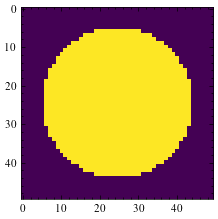

In [220]:
'''img = np.zeros((45, 45))
center_coordinates = (img.shape[0]//2, img.shape[1]//2) 
img = cv2.circle(img, center_coordinates, 20, (255,255,255), -1) 
plt.imshow(img)'''


N = 50
#img =  tf.image.rot90(tf.random.uniform(shape=(50,50,1), minval=0., maxval=1.), k=1) #
#img = tf.image.pad_to_bounding_box(img, 25//2,25//2,N+25, N+25)[...,0]

img =  tf.expand_dims(cv2.imread('input4.png', 0)/255. , axis=-1)
H, W, C = img.shape  # Get image dimensions
offset_height = (H - N) // 2
offset_width = (W - N) // 2
img = tf.image.crop_to_bounding_box(img, offset_height, offset_width, N, N)[...,0]
plt.imshow(img)
img.shape


(50, 50)


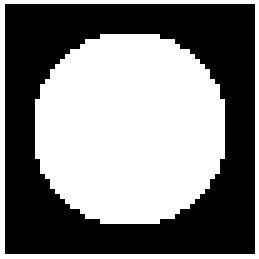

In [221]:
#var = 2/(128*9)

fig,ax = plt.subplots(1)

ax.imshow(img, cmap='gray')

#img = (img-np.mean(img))/np.std(img)
#img = tf.repeat(tf.expand_dims([img], axis=-1) , repeats = 512, axis=-1)  #get_double_slit(shape) , axis=0)
print(img.shape)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig("input.png",bbox_inches='tight',   pad_inches = 0)


Original shape: (500, 500)


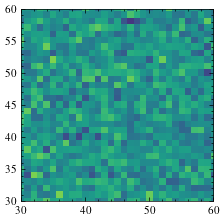

In [222]:
img = np.random.normal(loc=0.0, scale=1.0, size=(500, 500))
print("Original shape:", img.shape)

# Pad with 10 pixels of zeros on all sides
img = np.pad(img, pad_width=((10, 10), (10, 10)), mode='constant', constant_values=0)

fig, ax = plt.subplots()
ax.imshow(img)
x_min, x_max = 30, 60
y_min, y_max = 30, 60

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.show()

tf.Tensor(1.0, shape=(), dtype=float64)
tf.Tensor(1.0079809766567136, shape=(), dtype=float64)
tf.Tensor(1.0310554356896182, shape=(), dtype=float64)
tf.Tensor(1.066833155159449, shape=(), dtype=float64)
tf.Tensor(1.111929523933396, shape=(), dtype=float64)
tf.Tensor(1.1625574447466513, shape=(), dtype=float64)
tf.Tensor(1.2149934329403305, shape=(), dtype=float64)
tf.Tensor(1.265860708779839, shape=(), dtype=float64)
tf.Tensor(1.3122626666574368, shape=(), dtype=float64)
tf.Tensor(1.3518248285087247, shape=(), dtype=float64)
tf.Tensor(1.3826924063995278, shape=(), dtype=float64)
tf.Tensor(1.4035121340383754, shape=(), dtype=float64)
tf.Tensor(1.4134128771475603, shape=(), dtype=float64)
tf.Tensor(1.411991304625562, shape=(), dtype=float64)
tf.Tensor(1.3993049091302565, shape=(), dtype=float64)
tf.Tensor(1.3758730128072847, shape=(), dtype=float64)
tf.Tensor(1.3426856830877556, shape=(), dtype=float64)
tf.Tensor(1.301219644351623, shape=(), dtype=float64)
tf.Tensor(1.2534581840399157, 

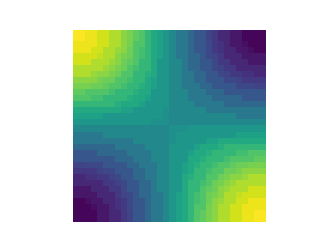

In [237]:

k = 32
w = np.zeros((k,k,1,1))


t1 = np.zeros((k,k))
t2 = np.zeros((k,k))
t3 = np.zeros((k,k))

'''t1[1, 2] = 1.
t2[2, 1] = 1.'''
t1[1,1] = 1.
t2[2, 0] = 1.
t3[0, 2] = 1.


w1 = fft.idctn(t1, norm='ortho')
#w1 /= np.sum(np.abs(w1))

w2 = fft.idctn(t2, norm='ortho') -  fft.idctn(t3, norm='ortho')
#w2 /= np.sum(np.abs(w2))

frames = []
angles = np.linspace(-np.pi, np.pi, 100)

angle0 = np.pi/8


for angle in angles :    
    
    fig, ax = plt.subplots()


    w[:,:,0,0] = (np.cos(2*angle))*w1 + ( np.sin(2*angle))*w2
    print(tf.math.reduce_euclidean_norm(w))
    w[:,:,0,0] = w[:,:,0,0] / (tf.math.reduce_euclidean_norm(w))


    im = ax.imshow(w[:,:,0,0], cmap=cm.viridis, animated=True)
    ax.axis("off")

    fig.canvas.draw()
    frame = np.array(fig.canvas.renderer.buffer_rgba())
    frames.append(Image.fromarray(frame))

    plt.close(fig)  # close to avoid showing each frame in notebook

frames[0].save("animation.gif", save_all=True, append_images=frames[1:], duration=100, loop=0)
from IPython.display import Image as IPyImage
IPyImage(filename="animation.gif")


In [224]:
w = np.zeros((3,3,1,1))


t1 = np.zeros((3,3))
t2 = np.zeros((3,3))
t3 = np.zeros((3,3))

'''t1[1, 2] = 1.
t2[2, 1] = 1.'''
t1[1,1] = 1.
t2[2, 0] = 1.
t3[0, 2] = 1.



w1 = fft.idctn(t1, norm='ortho')
#w1 /= np.sum(np.abs(w1))

w2 = fft.idctn(t2, norm='ortho') -  fft.idctn(t3, norm='ortho')
#w2 /= np.sum(np.abs(w2))



angle0 = 0

w[:,:,0,0] = (np.cos(2*angle0))*w1 + ( np.sin(2*angle0))*w2
print(tf.math.reduce_euclidean_norm(w))
w[:,:,0,0] = w[:,:,0,0] / (tf.math.reduce_euclidean_norm(w))


print(tf.math.reduce_euclidean_norm(w))
x = img

print("IMG", (tf.math.reduce_euclidean_norm(img)))





response_mag = []
init_mag = tf.math.reduce_euclidean_norm(x).numpy()



i0 = tf.cast(tf.repeat(tf.expand_dims([img], axis=-1) , repeats = w.shape[-2], axis=-1), dtype=tf.float32) 

print("I0,", tf.math.reduce_euclidean_norm(i0))


i1 = tf.nn.relu(tf.nn.conv2d(i0, w , strides=(1,1), padding='SAME') )

print("I1,", tf.math.reduce_euclidean_norm(i1))



init_mag = tf.math.reduce_euclidean_norm(i1).numpy()

angles = np.linspace(-np.pi, np.pi, 100)
for i in range(100):
	#fig, ax = plt.subplots()
	
	
	w[:,:,0,0] = (np.cos(2*angles[i]))*w1 + ( np.sin(2*angles[i]))*w2
	w[:,:,0,0] = w[:,:,0,0] / (tf.math.reduce_euclidean_norm(w))
		
	x_out = tf.nn.relu( tf.nn.conv2d(i1, w , strides=(1,1), 
								padding='SAME') )

	response_mag.append(tf.math.reduce_euclidean_norm(x_out).numpy()/init_mag)
	print(tf.math.reduce_euclidean_norm(x_out).numpy(), response_mag[-1])

tf.Tensor(1.0, shape=(), dtype=float64)
tf.Tensor(1.0, shape=(), dtype=float64)
IMG tf.Tensor(499.47236639490166, shape=(), dtype=float64)
I0, tf.Tensor(499.47235, shape=(), dtype=float32)
I1, tf.Tensor(353.47205, shape=(), dtype=float32)
277.8687 0.78611225
275.20425 0.7785743
267.6015 0.75706553
256.34836 0.7252295
243.03296 0.6875592
229.11382 0.64818084
215.69487 0.61021763
203.51689 0.5757652
193.03514 0.54611146
184.5158 0.52200955
178.09946 0.50385725
173.86043 0.4918647
171.84279 0.48615667
172.06293 0.48677945
174.52304 0.4937393
179.21156 0.5070035
186.08464 0.52644795
195.0553 0.55182666
205.96092 0.5826795
218.50674 0.61817265
232.17665 0.65684587
246.13751 0.69634223
259.1856 0.7332563
269.79257 0.76326424
276.377 0.7818921
277.7932 0.7858987
273.7794 0.7745432
265.07465 0.74991685
253.10092 0.7160423
239.45871 0.6774474
225.53534 0.63805705
212.35158 0.6007592
200.56992 0.56742793
190.58217 0.5391718
182.60477 0.5166031
176.76155 0.50007224
173.11769 0.48976347
171.70021 

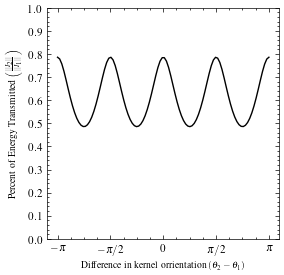

In [225]:
fig, ax= plt.subplots(1,1, figsize=(3,3))

ax.plot(angles,response_mag)

ticks = np.arange(-np.pi, 1.5*np.pi, np.pi/2)
labels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
# Set ticks and labels on the x-axis
ax.set_xticks(ticks=ticks, labels=labels);
ax.set_yticks(ticks=np.arange(0,1.1, 0.1));

ax.set_ylabel(r"Percent of Energy Transmitted $\left( \frac{||I_{2}||}{||I_{1}||} \right)$", fontsize=7)
ax.set_xlabel(r"Difference in kernel orrientation $(\theta_2 - \theta_1)$", fontsize=7)

plt.savefig('malus2_saddle.pdf', dpi=600)
plt.show()


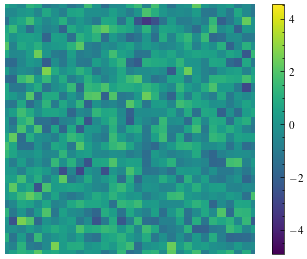

In [226]:
i0 = tf.cast(tf.repeat(tf.expand_dims([img], axis=-1) , repeats = w.shape[-2], axis=-1), dtype=tf.float32) 

fig, ax= plt.subplots(1,1)


im =ax.imshow(i0[0,...,0])
#ax.plot(45//2, 45, marker = '+', color='red');



ax.set(xlim=(0, img.shape[0]), ylim=(0,  img.shape[1]));

x_min, x_max = 30, 60
y_min, y_max = 30, 60

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

fig.colorbar(im, orientation='vertical');

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig("i0_high_order.pdf",bbox_inches='tight',   pad_inches = 0, dpi=600)


tf.Tensor(499.47235, shape=(), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=353.47205>

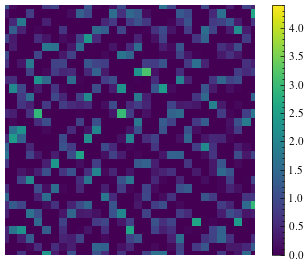

In [227]:
angle = -np.pi

w = np.zeros((3,3,1,1))

w[:,:,0,0] = (np.cos(2*angle))*w1 + ( np.sin(2*angle))*w2
w[:,:,0,0] = w[:,:,0,0] / (tf.math.reduce_euclidean_norm(w))


i0 = tf.cast(tf.repeat(tf.expand_dims([img], axis=-1) , repeats = w.shape[-2], axis=-1), dtype=tf.float32) 

print((tf.math.reduce_euclidean_norm(i0)))

i1_x = tf.nn.relu( tf.nn.conv2d(i0, w , strides=(1,1), 
							 padding='SAME') )


fig, ax= plt.subplots(1,1)

im =ax.imshow(i1[0,...,0])
#ax.plot(45//2, 45, marker = '+', color='red');




ax.set(xlim=(0, img.shape[0]), ylim=(0,  img.shape[1]));
x_min, x_max = 30, 60
y_min, y_max = 30, 60

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

fig.colorbar(im, orientation='vertical');

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig("i1_high_order.pdf",bbox_inches='tight',   pad_inches = 0, dpi=600)
tf.math.reduce_euclidean_norm(i1)



<tf.Tensor: shape=(), dtype=float32, numpy=277.8687>

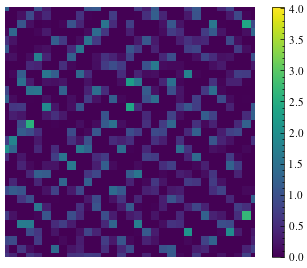

In [228]:
angle = -np.pi

w[:,:,0,0] = (np.cos(2*angle))*w1 + ( np.sin(2*angle))*w2
w[:,:,0,0] = w[:,:,0,0] / (tf.math.reduce_euclidean_norm(w))




i2_x = tf.nn.relu( tf.nn.conv2d(i1, w , strides=(1,1), 
							 padding='SAME') )


fig, ax= plt.subplots(1,1)

im =ax.imshow(i2_x[0,...,0])
#ax.plot(45//2, 45, marker = '+', color='red');



ax.set(xlim=(0, img.shape[0]), ylim=(0,  img.shape[1]));
x_min, x_max = 30, 60
y_min, y_max = 30, 60

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)


fig.colorbar(im, orientation='vertical');

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig("i2_y_high_order.pdf",bbox_inches='tight',   pad_inches = 0, dpi=600)
tf.math.reduce_euclidean_norm(i2_x)

<tf.Tensor: shape=(), dtype=float32, numpy=277.95602>

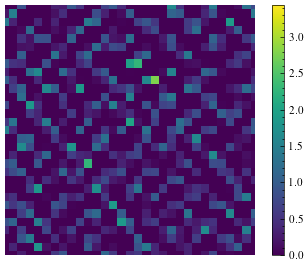

In [229]:
angle = np.pi/2

w[:,:,0,0] = (np.cos(2*angle))*w1 + ( np.sin(2*angle))*w2
w[:,:,0,0] = w[:,:,0,0] / (tf.math.reduce_euclidean_norm(w))




i2_y = tf.nn.relu( tf.nn.conv2d(i1, w , strides=(1,1), 
							 padding='SAME') )


fig, ax= plt.subplots(1,1)

im =ax.imshow(i2_y[0,...,0])
#ax.plot(45//2, 45, marker = '+', color='red');



ax.set(xlim=(0, img.shape[0]), ylim=(0,  img.shape[1]));
x_min, x_max = 30, 60
y_min, y_max = 30, 60

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)


fig.colorbar(im, orientation='vertical');

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
#plt.savefig("i2_y_high_order.pdf",bbox_inches='tight',   pad_inches = 0, dpi=600)
tf.math.reduce_euclidean_norm(i2_y)

In [230]:
i0.shape

TensorShape([1, 520, 520, 1])

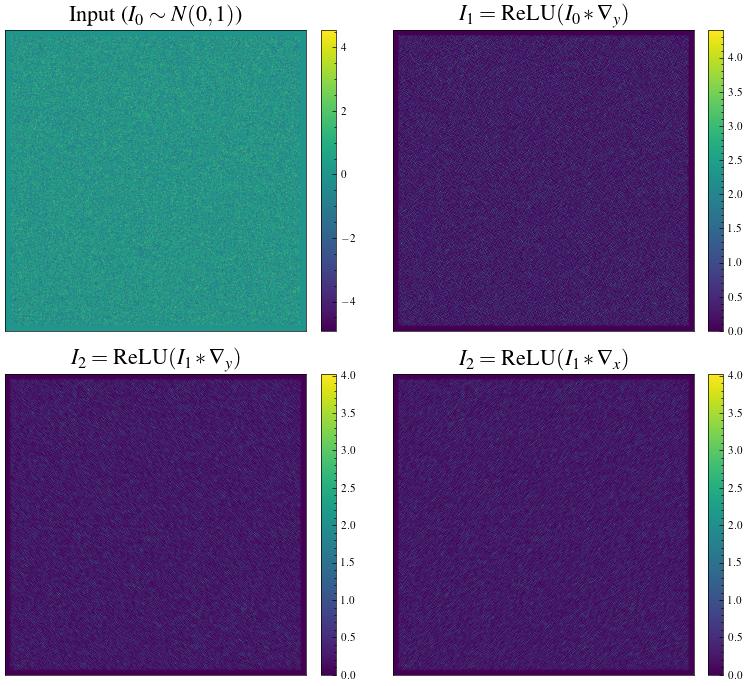

In [231]:
fig, axs = plt.subplots(2, 2, figsize=(8, 7))
title_fontsize = 16  # Adjust as needed

# Top-left
im0 = axs[0, 0].imshow(i0[0,...,0].numpy(), cmap='viridis')
axs[0, 0].set_title(r'Input ($I_0 \sim N(0, 1)$)', fontsize=title_fontsize)
fig.colorbar(im0, ax=axs[0, 0], fraction=0.046, pad=0.04)
#ax.set(xlim=(0, img.shape[0]), ylim=(0,  img.shape[1]));



#fig.colorbar(im, orientation='vertical');


# Top-right
im1 = axs[0, 1].imshow(i1_x[0,...,0].numpy(), cmap='viridis')
axs[0, 1].set_title(r'$I_1 = \mathrm{ReLU}(I_0 * \nabla_y)$', fontsize=title_fontsize)
fig.colorbar(im1, ax=axs[0, 1], fraction=0.046, pad=0.04)

# Bottom-left
im2 = axs[1, 0].imshow(i2_x[0,...,0].numpy(), cmap='viridis')
axs[1, 0].set_title(r'$I_2 = \mathrm{ReLU}(I_1 * \nabla_y)$', fontsize=title_fontsize)
fig.colorbar(im2, ax=axs[1, 0], fraction=0.046, pad=0.04)

vmin = i2_x[0,...,0].numpy().min()
vmax = i2_x[0,...,0].numpy().max()


# Bottom-right
im3 = axs[1, 1].imshow(
    i2_y[0,...,0].numpy(), 
    cmap='viridis', 
    vmin=vmin, 
    vmax=vmax
)
axs[1, 1].set_title(r'$I_2 = \mathrm{ReLU}(I_1 * \nabla_x)$', fontsize=title_fontsize)
fig.colorbar(im2, ax=axs[1, 1], fraction=0.046, pad=0.04)

# Optional: tighten layout and remove axis ticks
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.savefig("malus_saddle_circle.pdf", dpi=600)

plt.show()




In [232]:
np.max(i1_x), np.max(i2_x)

(4.4044127, 4.021778)

In [233]:
np.sum(w)

0.0

In [234]:
np.max(tf.nn.conv2d(i0, w , strides=(1,1), padding='SAME'))

4.416142

In [235]:
np.max(tf.nn.conv2d(i1, w , strides=(1,1), padding='SAME'))

3.4453125

AttributeError: 'FigureCanvasAgg' object has no attribute 'tostring_rgb'

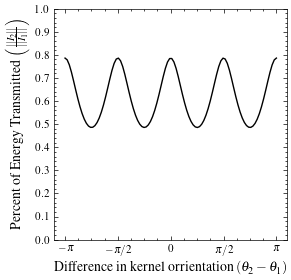

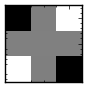

In [236]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea, VPacker
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

def render_patch_with_border(patch, border_color='black', border_width=1, zoom=1.0):
	"""
	Renders a patch using imshow-style with a border and returns it as an OffsetImage.
	"""
	# Create a tiny figure to render the patch using imshow
	fig, ax = plt.subplots(figsize=(1, 1), dpi=100)
	canvas = FigureCanvas(fig)

	ax.imshow(patch, cmap='gray', interpolation='none')
	ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)


	for spine in ax.spines.values():
		spine.set_visible(True)
		spine.set_linewidth(1)
		spine.set_color('black')

	# Make sure spines are drawn on top of the image
	ax.set_frame_on(True)
	# Add rectangle border
	'''h, w = patch.shape
	ax.add_patch(plt.Rectangle(
		(-0.5, -0.5), w, h,
		edgecolor=border_color,
		facecolor='none',
		linewidth=border_width
	))'''

	# Render to array
	canvas.draw()
	img = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
	img = img.reshape(canvas.get_width_height()[::-1] + (3,))

	plt.close(fig)
	return OffsetImage(img, zoom=zoom)

# Function to place image on the curve

def add_patch_with_label(ax, x, y, patch, label):
	# Create rendered image with border
	imagebox = render_patch_with_border(patch, border_color='black', border_width=2, zoom=0.2)

	# Create label
	textbox = TextArea(label, textprops={
		'fontsize': 7,
		'ha': 'center',
		'va': 'center',
		'bbox': dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1')
	})

	# Stack vertically
	vpack = VPacker(children=[textbox, imagebox], align="center", pad=0, sep=3)
	ab = AnnotationBbox(vpack, (x, y), frameon=False, box_alignment=(0.5, 0.5))

	ax.add_artist(ab)


fig, ax= plt.subplots(1,1, figsize=(3,3))

ax.plot(angles,response_mag)

ticks = np.arange(-np.pi, 1.5*np.pi, np.pi/2)
labels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
# Set ticks and labels on the x-axis
ax.set_xticks(ticks=ticks, labels=labels);
ax.set_yticks(ticks=np.arange(0,1.1, 0.1));

ax.set_ylabel(r"Percent of Energy Transmitted $\left( \frac{||I_{2}||}{||I_{1}||} \right)$", fontsize=10)
ax.set_xlabel(r"Difference in kernel orrientation $(\theta_2 - \theta_1)$", fontsize=10)

# Locations along curve
x1, y1 = -np.pi/2, response_mag[len(response_mag)//4]  # for dy
x2, y2 = np.pi, response_mag[-1]     # for dx
w[:,:,0,0] = (np.cos(np.pi))*w1 + ( np.sin(np.pi))*w2
dx_kernel = w[:,:,0,0]
dy_kernel = dx_kernel.T



add_patch_with_label(ax, x1,  y1-0.09, dy_kernel, r'$I_2 = \mathrm{ReLU}(I_1 * \nabla_x\nabla_y^2)$')
add_patch_with_label(ax, x2+0.05, y2+0.1, dx_kernel, r'$I_2 = \mathrm{ReLU}(I_1 * \nabla_y\nabla_x^2)$')


plt.savefig('malus_curve_circle_high_order.pdf', dpi=600)
plt.show()


In [ ]:
a = np.pi
w[:,:,0,0] = (np.cos(a))*w1 + ( np.sin(a))*w2

print((tf.math.reduce_euclidean_norm(w)))

w[:,:,0,0] = w[:,:,0,0] / (tf.math.reduce_euclidean_norm(w))
print((tf.math.reduce_euclidean_norm(w)))



tf.Tensor(1.0, shape=(), dtype=float64)
tf.Tensor(1.0, shape=(), dtype=float64)


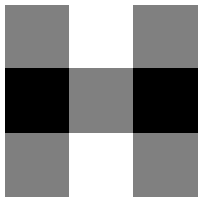

In [ ]:
w[:,:,0,0] = (np.cos(np.pi/2))*w1 + ( np.sin(np.pi/2))*w2





p = plt.imshow(w[:,:,0,0], cmap='gray')
plt.axis('off')
p


array([[[[ 0.13608276]],

        [[ 0.        ]],

        [[-0.13608276]]],


       [[[ 0.13608276]],

        [[ 0.        ]],

        [[-0.13608276]]],


       [[[ 0.13608276]],

        [[ 0.        ]],

        [[-0.13608276]]]])

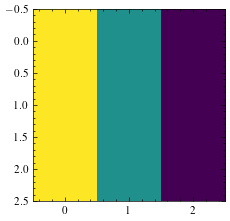

In [ ]:
a = np.zeros((3,3))
a[0, 1] =1
a = np.reshape(fft.idctn(a, norm='ortho'), (3,3,1,1))

b = np.zeros((3,3))
b[0, 0] =1
b = np.reshape(fft.idctn(b, norm='ortho'), (3,3,1,1))

dct_basis = a*b

plt.imshow(dct_basis[..., 0,0])
dct_basis